In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mse

In [10]:
missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
data = pd.read_csv("../Clean_Dataset/Final.csv",na_values = missing_values)
data = data.iloc[: , 1:]
data.head()

,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
0,Albania,ALB,1990,3.30,17.00,NaN,2548.112549,2794.399902
1,Albania,ALB,1991,3.82,20.61,NaN,1908.095337,2071.899902
2,Albania,ALB,1992,3.40,20.07,NaN,1822.334717,2158.600098
3,Albania,ALB,1993,3.53,22.12,NaN,2056.373047,2685.000000
4,Albania,ALB,1994,3.94,24.94,NaN,2288.676025,2460.899902


In [11]:
traindata = data.loc[(data['Year'] <= 2015) & (data['Year'] > 1999)]
testdata = data.loc[(data['Year'] > 2015) & (data['Year']<=2018)]



In [12]:
country = ['Canada','India','Germany','France']
traindata = traindata.loc[(data['Entity'] == 'Canada') | (data['Entity'] == 'India') | (data['Entity'] == 'Germany') | (data['Entity'] == 'France')]
xtrain = traindata[['Entity','Code','Year','Electricity(TWh)','health_expenditure','Cereal yield']]
xtest = testdata[['Entity','Code','Year','Electricity(TWh)','health_expenditure','Cereal yield']]
ytrain = traindata[['Entity','Code','Year','GDP']]
ytest = testdata[['Entity','Code','Year','GDP']]


## Elastic Net Model

In [13]:
from sklearn.linear_model import ElasticNet

for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten().round()
    ENmodel = ElasticNet(alpha=1.0, l1_ratio=0.5)
    ENmodel.fit(x,y)
    predictions = ENmodel.predict(xtest_new).round()
    print(each, " :")
    print("actual: ",ytest_new)
    print("predicted: ",predictions)
    print("RMSE: ",math.sqrt(mse(ytest_new,predictions)),"\n")

Canada  :
actual:  [46472. 48317. 49993.]
predicted:  [47750. 48410. 49061.]
RMSE:  27.70679820308847 

India  :
actual:  [5840. 6183. 6675.]
predicted:  [5975. 6202. 6672.]
RMSE:  7.234178138070235 

Germany  :
actual:  [50580. 53071. 55235.]
predicted:  [50637. 53153. 56165.]
RMSE:  18.876793513023692 

France  :
actual:  [42925. 44577. 46577.]
predicted:  [42102. 42639. 44189.]
RMSE:  41.428653530296316 



In [103]:
# multiple linear regression
from sklearn import linear_model

predict =[]
for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten().round()

    reg =linear_model.LinearRegression()
    reg.fit(x,y)
    print(each, " :")
    print("actual: ",ytest_new)
    print("predicted: ",reg.predict(xtest_new))
    predict.append(reg.predict(xtest_new))



Canada  :
actual:  [46472. 48317. 49993.]
predicted:  [[47750.86583043]
 [48410.77284978]
 [49060.64039712]]
India  :
actual:  [5840. 6183. 6675.]
predicted:  [[5974.92120339]
 [6197.92899991]
 [6668.28750793]]
Germany  :
actual:  [50580. 53071. 55235.]
predicted:  [[50636.89611296]
 [53153.02266945]
 [56163.82002396]]
France  :
actual:  [42925. 44577. 46577.]
predicted:  [[42098.98682805]
 [42636.90348965]
 [44188.49446149]]


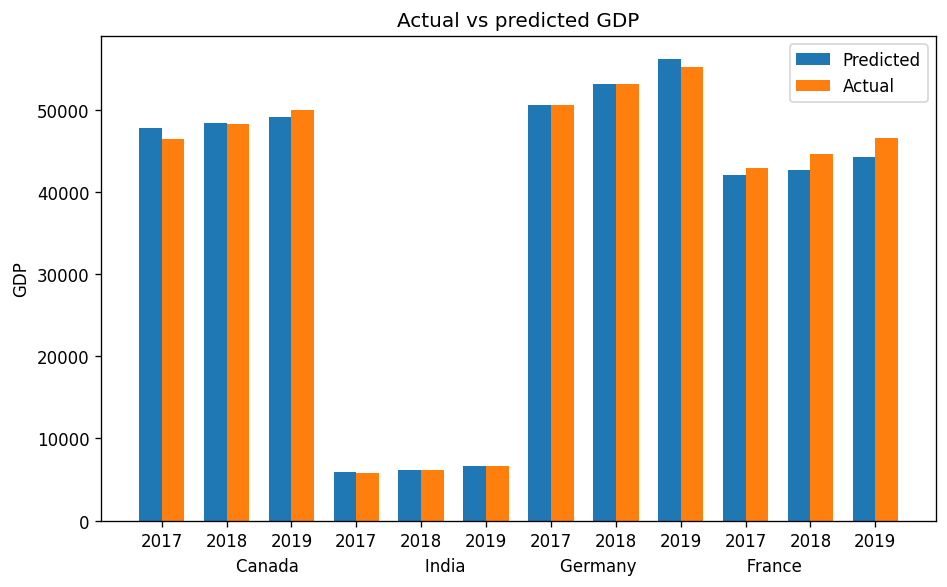

In [157]:
import seaborn as sns
from itertools import chain
flatten_list = list(chain.from_iterable(predict))
flatten_list = list(chain.from_iterable(flatten_list ))
ynew =[]
for each in country: 
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten()
    ynew.append(ytest_new)
ynew =list(chain.from_iterable(ynew))

labels = ['2017', '2018', '2019','2017', '2018', '2019','2017', '2018', '2019','2017', '2018', '2019',]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, flatten_list, width, label='Predicted')
rects2 = ax.bar(x + width/2, ynew, width, label='Actual')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GDP')
ax.set_xlabel('Canada                        India                  Germany                     France')

ax.set_title('Actual vs predicted GDP')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=8)
# ax.bar_label(rects2, padding=15)

fig.tight_layout()
plt.show()



In [159]:
# SLR model prediction
import statsmodels.api as sm
from sklearn import linear_model

for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten().round()

    x1 = x['Electricity(TWh)'].values.reshape(-1,1)
    x2 = x['health_expenditure'].values.reshape(-1,1)
    x3 = x['Cereal yield'].values.reshape(-1,1)

    reg =linear_model.LinearRegression()

    reg.fit(x1,y)
    print(each, " :" , 'Electricity(Twh) vs GDP')
    print("actual: ",ytest_new)
    print("predicted: ",reg.predict(xtest_new['Electricity(TWh)'].values.reshape(-1,1)))
    reg.fit(x2,y)
    print(each, " :" , 'health_expenditure vs GDP')
    print("actual: ",ytest_new)
    print("predicted: ",reg.predict(xtest_new['health_expenditure'].values.reshape(-1,1)))
    reg.fit(x3,y)
    print(each, " :" , 'Cereal yield vs GDP')
    print("actual: ",ytest_new)
    print("predicted: ",reg.predict(xtest_new['Cereal yield'].values.reshape(-1,1)))
    
   # trying SLR model for india



Canada  : Electricity(Twh) vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [[46811.16941482]
 [46969.08166201]
 [45189.98276616]]
Canada  : health_expenditure vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [[47246.33537589]
 [48081.94770055]
 [49550.9244628 ]]
Canada  : Cereal yield vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [[48566.43893927]
 [46637.06819964]
 [44660.68894263]]
India  : Electricity(Twh) vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [[6142.4894223 ]
 [6466.22475147]
 [6967.86640283]]
India  : health_expenditure vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [[5905.01629965]
 [5167.38033382]
 [5615.23870317]]
India  : Cereal yield vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [[5375.26970841]
 [6029.5530838 ]
 [6390.55055019]]
Germany  : Electricity(Twh) vs GDP
actual:  [50580. 53071. 55235.]
predicted:  [[42786.9186764 ]
 [43440.59759018]
 [41127.326777  ]]
Germany  : health_expenditure vs GDP
actual:  [50580. 53071. 55235.]
predicted:  [[50632.4595

In [ ]:
# slr model for india for all different categories

Augmented Dickey-Fuller Statistic: -2.817552
p-value: 0.055810
Augmented Dickey-Fuller Statistic: 0.209270
p-value: 0.972777
Augmented Dickey-Fuller Statistic: 2.070127
p-value: 0.998757
Augmented Dickey-Fuller Statistic: -1.601512
p-value: 0.482834


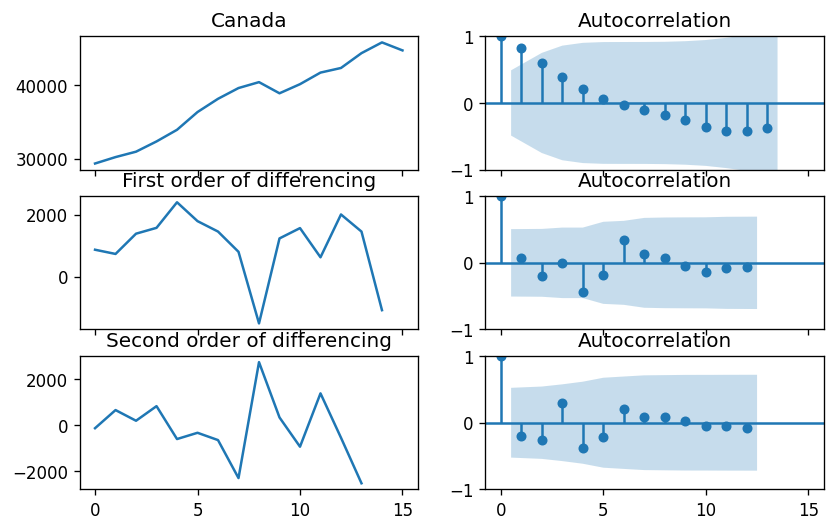

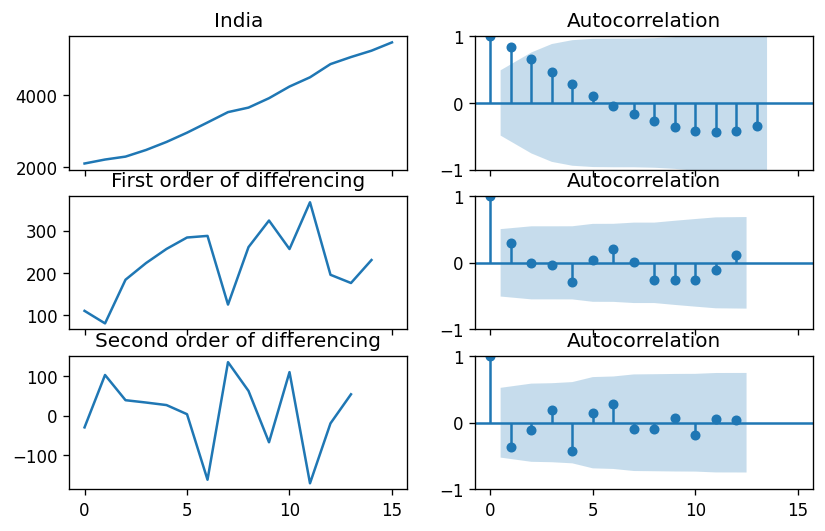

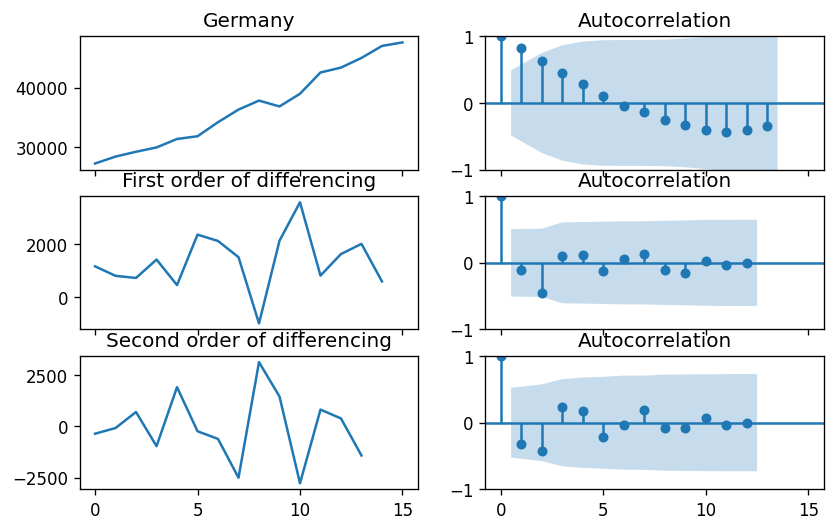

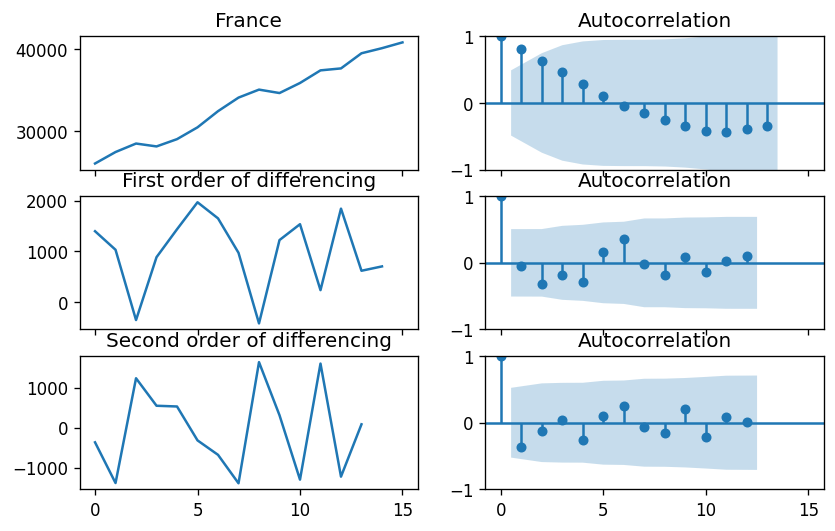

In [17]:
# ARIMA Model
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from numpy import sqrt,mean,log,diff



for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Year','Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['Year','GDP']]


    y = y.set_index('Year')
    # performing dickeyfuller test to  determine whether the time series is staionary or not. 
    res = adfuller( y.dropna())  
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
    print('p-value: %f' % res[1])   

    #ACF plot 
    plt.rcParams.update({'figure.figsize' : (8,5), 'figure.dpi' : 120})  
    fig, axes = plt.subplots(3, 2, sharex = True)  
    axes[0, 0].plot(y.to_numpy().flatten()); axes[0, 0].set_title(each)  
    plot_acf(y.to_numpy().flatten(), ax = axes[0, 1])  

    y1 = y.diff().dropna()
    axes[1,0].plot(y1.to_numpy().flatten()); axes[1, 0].set_title("First order of differencing")  
    plot_acf(y1.to_numpy().flatten(), ax = axes[1, 1])  
    
    y2 = y.diff().diff().dropna()
    axes[2,0].plot(y2.to_numpy().flatten()); axes[2, 0].set_title("Second order of differencing")  
    plot_acf(y2.to_numpy().flatten(), ax = axes[2, 1])  
    


As we can observe, the time series has reached stationarity with one differencing orders. 

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  
import numpy as np, pandas as pd  

    

    y = y.set_index('Year')
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  
    fig, axes = plt.subplots(1, 2, sharex = True)  
    axes[0].plot(y.diff()); axes[0].set_title('Order of Differencing: First')  
    y3 = y.diff().dropna()
    # y3 =y3.to_numpy().flatten()
    
    axes[1].set(ylim = (0,5))  
    print(y3)
    plot_pacf(y3,lags=6,method='ywm', ax = axes[1])  
    plt.show() 
    

#     # y2 = y.diff().diff().dropna()
#     # plot_acf(y2.to_numpy().flatten(), ax = axes[2, 1])  

IndentationError: unexpected indent (864461565.py, line 7)